# Jupyter Notebook: ANN & Perceptron (Python)
Dibuat: 2025-10-24 04:10:09


## Apa itu ANN (Artificial Neural Network)?
Artificial Neural Network (ANN) adalah model komputasi yang terinspirasi dari jaringan neuron biologis. ANN terdiri dari **neuron (unit)** yang terhubung dalam **lapisan (layers)**: *input layer*, satu atau lebih *hidden layer*, dan *output layer*. Setiap koneksi memiliki **bobot (weight)** yang dipelajari dari data melalui proses **training** (misalnya *gradient descent*). Fungsi aktivasi non-linear (ReLU, Sigmoid, Tanh) memberi kemampuan ANN memodelkan hubungan yang kompleks.

Ciri umum ANN:
- Dapat menangani masalah **klasifikasi** dan **regresi**.
- Belajar dari data melalui **optimisasi bobot** untuk meminimalkan **loss**.
- Dengan hidden layer non-linear yang cukup, ANN dapat menjadi **universal function approximator**.



## Apa itu Perceptron?
**Perceptron** adalah bentuk paling sederhana dari jaringan saraf: terdiri dari satu neuron (atau satu lapis linear) dengan fungsi aktivasi *step*. Ia cocok untuk **klasifikasi biner linear-separable**.

Rumus dasar (untuk satu sampel $\mathbf{x}$):
$$
y = \text{step}(\mathbf{w}^T\mathbf{x} + b)
$$

Keterbatasan Perceptron:
- Hanya mampu memisahkan data **linear separable** (tidak dapat menyelesaikan masalah XOR).
- Tidak memiliki *hidden layer* sehingga tidak bisa menangkap pola non-linear yang kompleks.

Solusi: gunakan **Multi-Layer Perceptron (MLP)**, yaitu ANN dengan minimal satu hidden layer dan aktivasi non-linear.


In [1]:

# Install (opsional) bila diperlukan di lingkungan Anda:
# %pip install numpy scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons, load_iris, make_regression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error



## Contoh 1 — Perceptron pada Data Linear-Separable (Klasifikasi Biner)
Kita buat dataset sintetis yang hampir linear separable, latih **Perceptron**, dan evaluasi akurasinya.


Akurasi Perceptron (linear-separable): 0.976
Confusion Matrix:
 [[62  1]
 [ 2 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.98      0.97      0.98        62

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



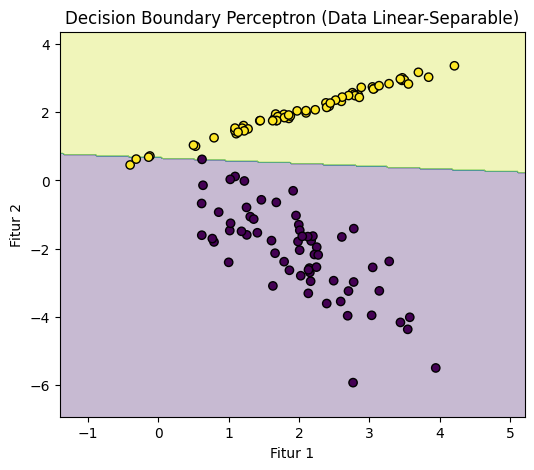

In [3]:

# Dataset sintetis biner
X, y = make_classification(
    n_samples=500, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=2.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_perc = Perceptron(max_iter=1000, random_state=42)
clf_perc.fit(X_train, y_train)

y_pred = clf_perc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Perceptron (linear-separable): {acc:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualisasi decision boundary (2D)
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Fitur 1")
    plt.ylabel("Fitur 2")
    plt.show()

plot_decision_boundary(clf_perc, X_test, y_test, "Decision Boundary Perceptron (Data Linear-Separable)")



## Contoh 2 — Menguji Keterbatasan Perceptron (XOR) vs. MLP
Masalah **XOR** tidak linear-separable. Perceptron gagal, namun **MLP** dengan satu hidden layer akan berhasil.


In [5]:

# Dataset XOR sederhana
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])  # XOR

# Perceptron
perc = Perceptron(max_iter=1000, random_state=42)
perc.fit(X_xor, y_xor)
pred_perc = perc.predict(X_xor)
print("Prediksi Perceptron pada XOR:", pred_perc)
print("Akurasi Perceptron pada XOR:", accuracy_score(y_xor, pred_perc))

# MLP (hidden layer 2 neuron, aktivasi tanh)
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=5000, random_state=42)
mlp_xor.fit(X_xor, y_xor)
pred_mlp = mlp_xor.predict(X_xor)
print("Prediksi MLP pada XOR:", pred_mlp)
print("Akurasi MLP pada XOR:", accuracy_score(y_xor, pred_mlp))


Prediksi Perceptron pada XOR: [0 0 0 0]
Akurasi Perceptron pada XOR: 0.5
Prediksi MLP pada XOR: [1 0 1 0]
Akurasi MLP pada XOR: 0.5


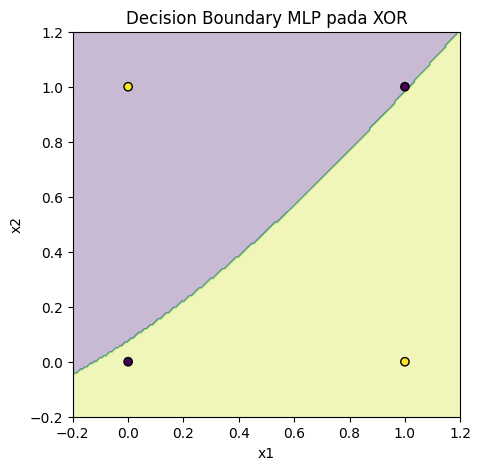

In [6]:

# Visualisasi decision boundary MLP pada grid [0,1]x[0,1]
grid = np.linspace(-0.2, 1.2, 200)
xx, yy = np.meshgrid(grid, grid)
Z = mlp_xor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_xor[:,0], X_xor[:,1], c=y_xor, edgecolor="k")
plt.title("Decision Boundary MLP pada XOR")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()



## Contoh 3 — ANN (MLP) untuk Klasifikasi Non-Linear (Moons)
Dataset **two-moons** merupakan contoh data non-linear. Kita latih **MLPClassifier** dan evaluasi.


Akurasi MLP (two-moons): 0.933
Confusion Matrix:
 [[74  3]
 [ 7 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        77
           1       0.96      0.90      0.93        73

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



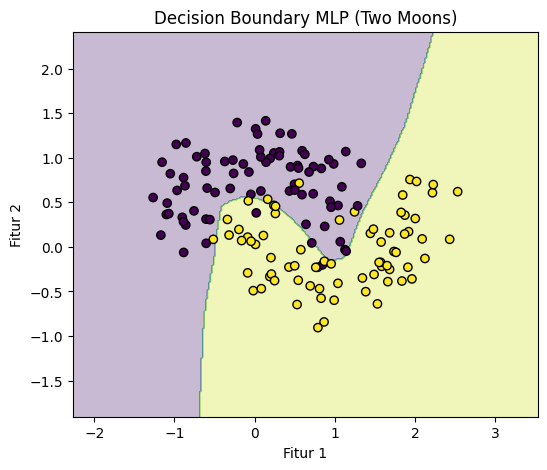

In [7]:

X_m, y_m = make_moons(n_samples=600, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=0.25, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi MLP (two-moons): {acc:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Decision boundary
def plot_decision_boundary_general(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Fitur 1")
    plt.ylabel("Fitur 2")
    plt.show()

plot_decision_boundary_general(mlp, X_test, y_test, "Decision Boundary MLP (Two Moons)")



## Contoh 4 — ANN (MLPRegressor) untuk Regresi
Kita bangun dataset regresi sederhana dari fungsi sinus, lalu latih **MLPRegressor** untuk memprediksi nilai kontinu.


MSE MLPRegressor: 0.1489


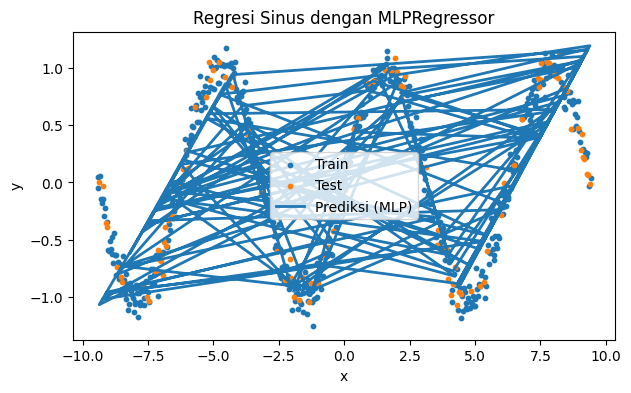

In [8]:

# Dataset regresi sinus
rng = np.random.RandomState(42)
X_reg = np.linspace(-3*np.pi, 3*np.pi, 600).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + 0.1 * rng.randn(len(X_reg))

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=3000, random_state=42)
mlp_reg.fit(X_train, y_train)

y_pred = mlp_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE MLPRegressor: {mse:.4f}")

# Plot hasil
plt.figure(figsize=(7,4))
plt.scatter(X_train, y_train, s=10, label="Train")
plt.scatter(X_test, y_test, s=10, label="Test")
plt.plot(X_test, y_pred, linewidth=2, label="Prediksi (MLP)")
plt.title("Regresi Sinus dengan MLPRegressor")
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()



## Contoh 5 — Multiclass Classification (Iris) dengan MLP


In [9]:

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

mlp_iris = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_iris.fit(X_train, y_train)
y_pred = mlp_iris.predict(X_test)
print(f"Akurasi MLP (Iris): {accuracy_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Akurasi MLP (Iris): 1.000
Confusion Matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38




## Tips & Best Practices
- **Scaling** fitur (StandardScaler/MinMaxScaler) biasanya membantu training MLP lebih stabil dan cepat konvergen.
- **Arsitektur**: mulai dari kecil (1–2 hidden layer) lalu tingkatkan jika diperlukan.
- **Regularisasi**: gunakan `alpha` (L2), **early stopping**, atau **dropout** (di framework deep learning) untuk mencegah overfitting.
- **Tuning**: coba variasi `hidden_layer_sizes`, *learning rate*, `activation` (relu/tanh), dan jumlah iterasi.
- **Evaluasi**: untuk klasifikasi gunakan akurasi/precision/recall/F1; untuk regresi gunakan MSE/RMSE/MAE.
